In [98]:
import numpy as np
import folium
from toll_detect.road_network import RoadNetwork
from toll_detect.road_node import RoadNode
from toll_detect.utils import *
from toll_detect.poi_tolls import *
from toll_detect.node_set import NodeSet
import pandas as pd
import geopy
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import json
with open('config.json', 'r') as f:
    config = json.loads(f.read())

In [3]:
rn_path = config['roadnetwork_path']
poi_toll_path = config['poi_toll_path']
rn = RoadNetwork(rn_path, check_node_consistency=True)
toll = POITolls(poi_toll_path)  # 旧版本的toll api

In [60]:
toll.df_toll.head()

,rowkey,poi_name,poi_city,poi_area,poi_geohash12wgs,position
0,711C67FF73B3BED0,茂名电白收费站,茂名市,电白区,w7ygn2pf8gm2,"[21.619046985057945, 111.0324133323577]"
1,3619A8A1D4C0C81C,林头收费站,茂名市,电白区,w7ygpug8qeh3,"[21.64483515403542, 111.09288967822872]"
2,12FCF1C1CF7102BF,林头收费站,茂名市,电白区,w7ygpugb30n9,"[21.644819145170697, 111.09300008014911]"
3,21B814EF88C63A2E,石鼓收费站,茂名市,高州市,w7ygb7jph95y,"[21.767967834521325, 110.76480830974742]"
4,3FBD9AC5D3ED3A93,石鼓收费站,茂名市,高州市,w7ygb7jnvegd,"[21.76793897919268, 110.76485073915887]"


In [4]:
intersection_set= rn.get_highway_intersections_coords()
len(rn.nodes), len(intersection_set)

(223115, 9856)

In [5]:
len(set(rn.df_road_net['start_id']) | set(rn.df_road_net['end_id']))

223115

In [6]:
def plot_points(points):
    """绘制点到地图上"""
    m = folium.Map(location=points[0], zoom_start=12)
    for p in points:
        folium.Marker(p).add_to(m)
    return m

In [31]:
plot_points(intersection_set.coords(False)[:200])

In [8]:
neareaset_node_set, distances_to_neareast_node = toll.nearest_nodes(intersection_set, k=1, return_distance=True)

(array([954.,  37.,  12.,  16.,   3.,   0.,   2.,   2.,   2.,   2.]),
 array([   20.80042512,  1905.4256316 ,  3790.05083809,  5674.67604458,
         7559.30125106,  9443.92645755, 11328.55166404, 13213.17687052,
        15097.80207701, 16982.4272835 , 18867.05248998]),
 <a list of 10 Patch objects>)

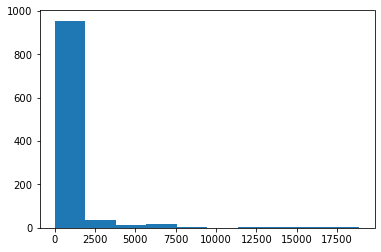

In [9]:
import matplotlib.pyplot as plt
plt.hist(distances_to_neareast_node)

In [10]:
np.mean(distances_to_neareast_node)

884.6483554271089

In [11]:
np.percentile(distances_to_neareast_node, [5, 50, 80,95])

array([ 120.0374019 ,  517.46814996,  836.09377959, 3308.70797026])

In [18]:
plot_toll_with_neareast_intersection_node(neareaset_node_set, toll, 
                            irange=np.arange(50), show_distances=True, show_connect_line=False)

In [45]:
rn.df_road_net['highway'].unique()

array(['trunk', 'secondary', 'motorway', 'unclassified', 'residential',
       'tertiary', 'service', 'primary', 'trunk_link', 'primary_link',
       'motorway_link', 'tertiary_link', 'road', 'living_street',
       'secondary_link'], dtype=object)

In [60]:
intersection_set.get_type_distribution_df()

,Ratio
trunk-trunk_link,16.203328
tertiary-trunk,13.403003
primary-trunk,5.113636
residential-trunk,14.163961
road-trunk,0.507305
...,...
motorway_link-primary-secondary_link-trunk,0.010146
motorway-service-trunk,0.010146
motorway-motorway_link-service-unclassified,0.010146
motorway_link-secondary_link-trunk,0.010146


In [61]:
neareaset_node_set.get_type_distribution_df()

,Ratio
motorway-primary,0.194175
motorway-motorway_link,67.572816
secondary-trunk,2.621359
trunk-unclassified,1.747573
motorway_link-trunk,4.077670
tertiary-trunk,2.621359
residential-trunk,2.815534
primary_link-trunk,0.776699
primary-trunk,1.456311
trunk-trunk_link,4.757282


## 测试删去'_link'符号的路网

In [80]:
rn_no_link = RoadNetwork(rn_path, check_node_consistency=False, change_value=True)

In [81]:
intersection_set_no_link= rn_no_link.get_highway_intersections_coords()
len(rn_no_link.nodes), len(intersection_set_no_link)

(223115, 1686)

In [37]:
neareaset_node_set_no_link, distances_to_neareast_node_no_link = toll.nearest_nodes(intersection_set_no_link
                                                                            , k=1, return_distance=True)

In [38]:
np.mean(distances_to_neareast_node_no_link)

1355.6279620781177

In [39]:
np.percentile(distances_to_neareast_node_no_link, [5, 50, 80,95])

array([ 228.97049823,  620.36188796,  955.68553953, 5513.72413294])

In [40]:
df_intersection_set_no_link = intersection_set_no_link.get_type_distribution_df()
df_intersection_set_no_link

,Ratio
motorway+trunk,22.419929
motorway+service,9.074733
motorway+primary,23.606168
motorway+secondary,21.293001
motorway+primary+tertiary,1.304864
motorway+residential+tertiary,0.296560
motorway+primary+unclassified,0.237248
motorway+tertiary,10.794781
motorway+secondary+tertiary,0.830368
motorway+unclassified,2.669039


In [52]:
len(intersection_set_no_link)

1686

In [41]:
neareaset_node_set_no_link.get_type_distribution_df()

,Ratio
motorway+primary,26.699029
motorway+trunk,18.737864
motorway+secondary+tertiary,1.067961
motorway+secondary,24.368932
motorway+primary+secondary,1.262136
motorway+tertiary,12.718447
motorway+tertiary+unclassified,0.485437
motorway+service,2.815534
motorway+unclassified,1.650485
motorway+residential,2.135922


## 可视化检查测试的其他类型路段

In [64]:
def plot_node_with_type(node_set):
    """绘制点到地图上"""
    points = node_set.coords(False)
    types = node_set.road_types()
    m = folium.Map(location=points[0], zoom_start=12)
    for p, t in zip(points, types):
        folium.Marker(p, popup=t).add_to(m)
    return m

In [66]:
other_type_nodes = intersection_set_no_link.get_nodes_not_contain_specified_type(['primary','secondary', 'tertiary', 'trunk'])
plot_node_with_type(other_type_nodes)

In [42]:
large_dis_range = np.arange(len(distances_to_neareast_node_no_link))[np.array(distances_to_neareast_node_no_link) > 3000]


In [53]:
plot_toll_with_neareast_intersection_node(neareaset_node_set_no_link, 
                                          toll, irange=large_dis_range, show_distances=True, show_connect_line=True)

#### 检查距离在500 - 800的收费站是否有问题

In [58]:
array_dis = np.array(distances_to_neareast_node_no_link) 
middle_dis_range = np.arange(len(distances_to_neareast_node_no_link))[(array_dis > 900) & (array_dis < 1500)]


In [59]:
plot_toll_with_neareast_intersection_node(neareaset_node_set_no_link, 
                                          toll, irange=middle_dis_range, show_distances=True, show_connect_line=True)

In [44]:
small_dis_range = np.arange(len(distances_to_neareast_node_no_link))[np.array(distances_to_neareast_node_no_link) < 900]

In [45]:
len(small_dis_range)

804

In [46]:
small_set = neareaset_node_set_no_link.sub_set(small_dis_range)

In [47]:
df_small_set_ratio = small_set.get_type_distribution_df()
df_small_set_ratio

,Ratio
motorway+primary,27.363184
motorway+trunk,17.661692
motorway+secondary+tertiary,1.119403
motorway+primary+secondary,1.616915
motorway+secondary,25.373134
motorway+tertiary,12.313433
motorway+unclassified,2.114428
motorway+residential,2.487562
motorway+service,1.492537
motorway+residential+secondary,0.497512


In [50]:
from toll_detect.utils import count_coverage_ratio
count_coverage_ratio(df_small_set_ratio, ['primary','secondary', 'tertiary', 'trunk'])

['primary', 'secondary', 'tertiary', 'trunk'] will take Ratio    93.905473
Name: motorway+primary, dtype: float64 percent.


In [61]:
count_coverage_ratio(df_intersection_set_no_link, ['primary','secondary', 'tertiary', 'trunk'])

['primary', 'secondary', 'tertiary', 'trunk'] will take Ratio    86.417556
Name: motorway+trunk, dtype: float64 percent.


## 测试新的POI_TOLL类

In [74]:
from toll_detect.poi_tolls import POITolls

In [91]:
proper_intersection_set = intersection_set_no_link.get_subset_with_specified_type(['primary','secondary', 'tertiary', 'trunk'])


In [94]:
new_toll = POITolls(poi_toll_path, highway_intersection_node_set=proper_intersection_set)

In [90]:
def plot_toll_with_neareast_intersection_node(node_set, toll_coords, 
    show_distances=True, show_connect_line=True):
    m = folium.Map(location=node_set[0].get_coord(False), zoom_start=12)
    
    for idx, toll_coord in enumerate(toll_coords):
        nodes = node_set[idx]
        folium.Marker(toll_coord, icon=folium.map.Icon(color='orange')).add_to(m)
        if not isinstance(nodes, list):  # Support k >= 1
            nodes = [nodes]
        for node in nodes:
            node_coord = node.get_coord(False)
            node_info = node.connection_type + ':%d intersections. ' % node.connected_road_num
            if show_distances:
                node_info += ('distance to toll %.2f' % node.distance_to_coord(toll_coord))
            folium.Marker(node_coord, icon=folium.map.Icon(color='blue'), popup=node_info).add_to(m)
        if show_connect_line:
            folium.PolyLine(locations=[toll_coord, node_coord]).add_to(m)

    return m

In [95]:
plot_toll_with_neareast_intersection_node(new_toll.test_nodes, new_toll.filtered_coords)

In [106]:
# 更新版本的RoadNetwork
rn = RoadNetwork(rn_path, check_node_consistency=False, parse_full_road=True)

In [100]:
motorway_nodes = rn.get_highway_nodes(lon_first=False)

In [102]:
len(motorway_nodes)

93354

In [146]:
# 更新版本的POIToll
new_toll = POITolls(poi_toll_path, proper_intersection_set, motorway_nodes)

Number of filtered coords at first round 260
Number of readded coords: 45


In [129]:
plot_points(new_toll.readded_coords)

In [147]:
new_toll.visualize_tolls(idx_range=range(400), diff_grouped=True)

In [148]:
new_toll.dis_of_two_toll(297, 285)

568.0805272369832

In [133]:
new_toll.toll_class_to_idx[74]

[array([183, 866])]